# Histogram/Distribution plots for airflows

## Import dependencies and data

In [2]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plotting\\plots\\'

In [4]:
# set seaborn style/theme
sns.set_theme()
sns.set_style('white')

In [149]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=[0, 1, 2, 3, 4]
)

# convert index.date col to datetime
#data.index = pd.to_datetime(data.index.values)
data.loc[:, ('time', 'date')] = pd.to_datetime(data.time.date)

In [150]:
# keep only flow
data = data[[
    'setpoints',
    'state',
    'temperatures',
    'sun',
    'time'
]].copy()

# # filter out variables
# data = data.filter(
#     regex='DC_SP.*_absolute|TA01_GP101|TA01_SP102.*_absolute', 
#     axis=1
# )

In [151]:
data = data[[
    (   'setpoints',       'TA01_SP101'),
    (   'setpoints',       'TA01_SP102'),
    (       'state',      'TA01_output'),
    ('temperatures', 'TA01_GT10X_GM10X'),
    (         'sun',        'gsi_deriv'),
    (        'time',             'date')
]].copy()

In [152]:
data.columns = data.columns.droplevel(0)
data.index = data.date
del data['date']

## Plot distributions for airflows

In [153]:
data.mean()

sensor_ID
TA01_SP101          13.354800
TA01_SP102          86.645028
TA01_output         42.107677
TA01_GT10X_GM10X    20.744784
gsi_deriv            0.024086
dtype: float64

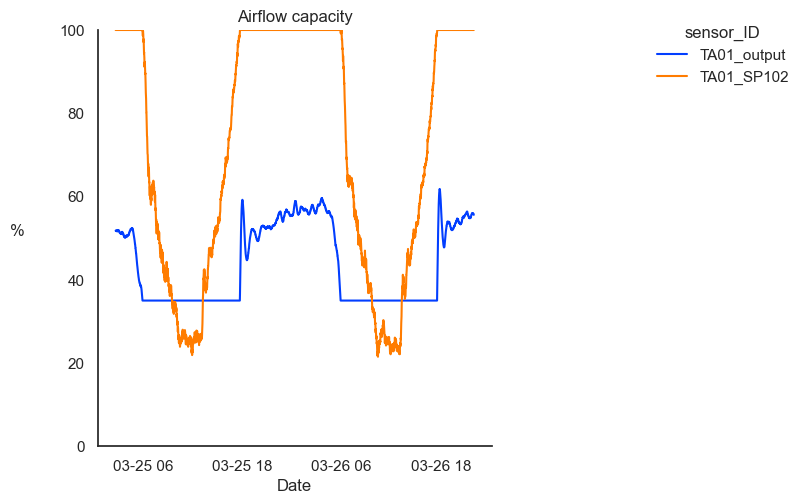

In [183]:
subset = data[[
    'TA01_output',
    'TA01_SP102',
#     'TA01_SP101'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    legend='full',
    palette='bright',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('%', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(0, 100)
plt.title('Airflow capacity')

fpath = plot_path + 'flow_ex_1.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

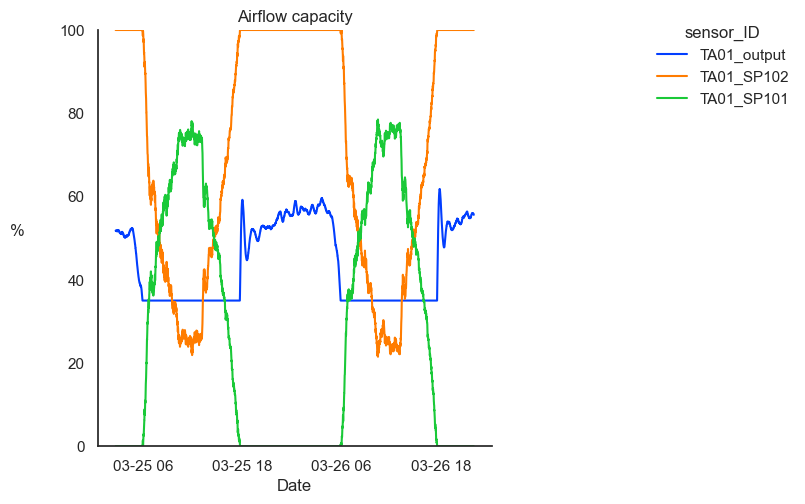

In [184]:
subset = data[[
    'TA01_output',
    'TA01_SP102',
    'TA01_SP101'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    legend='full',
    palette='bright',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('%', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
plt.ylim(0, 100)
plt.title('Airflow capacity')

fpath = plot_path + 'flow_ex_2.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

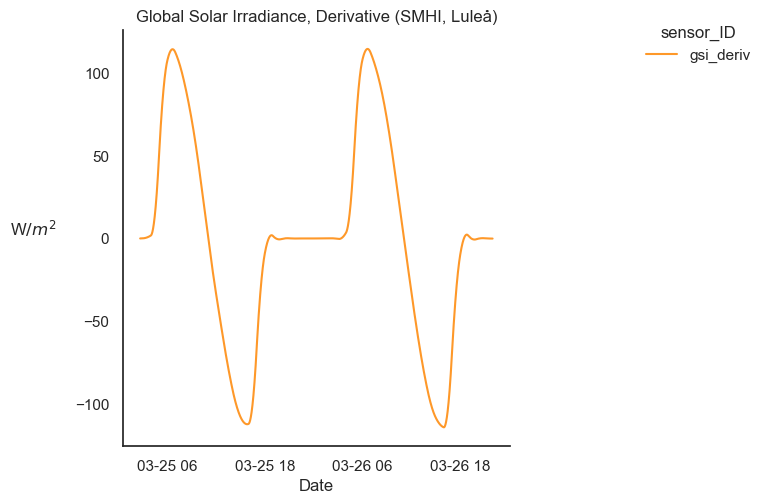

In [185]:
subset = data[[
    'gsi_deriv'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    legend='full',
    palette='YlOrBr',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('W$/m^2$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
#plt.ylim(0, 100)
plt.title('Global Solar Irradiance, Derivative (SMHI, Luleå)')

fpath = plot_path + 'flow_ex_3.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()

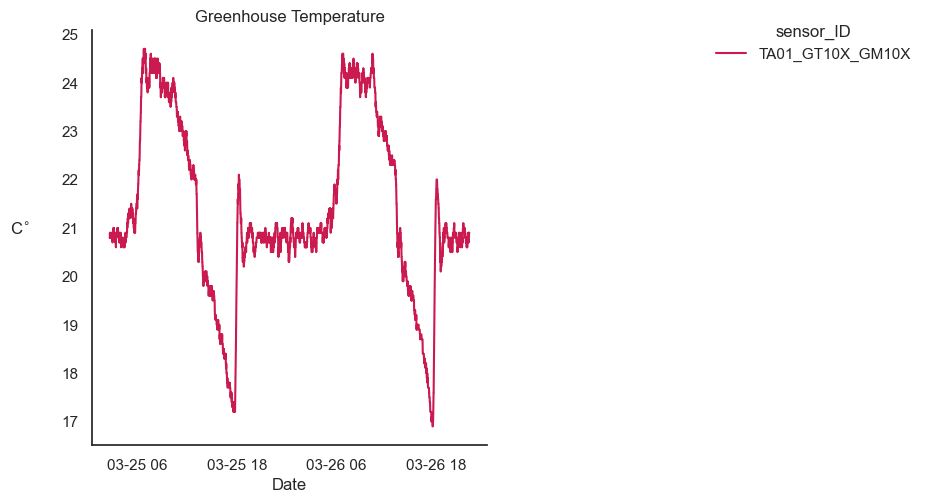

In [186]:
subset = data[[
    'TA01_GT10X_GM10X'
]].copy()

ax = sns.relplot(
    data=subset.iloc[-5200:], 
    kind='line', 
    linewidth=1.5,
    legend='full',
    palette='rocket_r',
    markers=False,
    dashes=False,
    alpha=1.0
)

ax.set_xticklabels(step=2)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Date')
plt.ylabel('C$^{\circ}$', loc='center', rotation=0, fontsize=12, labelpad=30)
#plt.xlim(-30, 60)
#plt.ylim(0, 100)
plt.title('Greenhouse Temperature')

fpath = plot_path + 'flow_ex_4.png'
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()